# Multilayer perceptron for regresion with backpropagation

In [1]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def relu(X):    
    return np.maximum(0, X)


def drelu(X):
    return 1 * (X > 0)


class CustomMLPRegressor(BaseEstimator, RegressorMixin):

    def __init__(self, hidden_layer_sizes=(10, ), max_iter=1000, eta=0.01,
                 f=relu, df=drelu):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.max_iter = max_iter
        self.eta = eta
        self.f = f
        self.df = df

    
    def fit(self, X, y):
        if y.ndim == 1:
            y = np.reshape(y, (y.shape[0],1)) #Convierte a vector
            
        #Initialize parameters
        self.W1 = np.random.randn(self.hidden_layer_sizes[0], X.shape[1])*0.01
        self.b1 = np.zeros((self.hidden_layer_sizes[0],1))
        self.W2 = np.random.randn(y.shape[1], self.hidden_layer_sizes[0])*0.01  
        self.b2 = np.zeros((y.shape[1],1)) 
        N = y.shape[0]   
        
        self.errors = []
        
        for i in range(0, self.max_iter):
            
            #Forward propagation
            A1 = self.f((X @ self.W1.T).T + self.b1)
            A2 = self.f((A1.T @ self.W2.T).T + self.b2)
          
            #Cost operation
            error = (1/2*N)*np.sum(np.square(A2.T - y))
            self.errors.append(error)
          
            #Backpropagation
            dZ2= A2 - y.T
            dW2 = (1/N)*(dZ2 @ A1.T)
            db2 = (1/N)*np.sum(dZ2, axis=1, keepdims=True)
            dZ1 = (self.W2.T @ dZ2)*self.df(A1)
            dW1 = (1/N)*(dZ1 @ X)
            db1 = (1/N)*np.sum(dZ1, axis=1, keepdims=True)
            
            #parameters update
            self.W1 = self.W1 - self.eta*dW1
            self.b1 = self.b1 - self.eta*db1
            self.W2 = self.W2 - self.eta*dW2
            self.b2 = self.b2 - self.eta*db2
        self.errors = np.squeeze(self.errors)
        plt.plot(self.errors)
        plt.ylabel('Error')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(self.eta))
        plt.show()
               
        return self

    def predict(self, X):
        A1 = self.f((X @ self.W1.T).T + self.b1)
        A2 = self.f((A1.T @ self.W2.T).T + self.b2)
        return A2.T
        

    def score(self, X, y):
        preds = self.predict(X)
        return r2_score(y, preds)

Comparation of Neural Network implemented with numpy vs Sklearn Library Model Neural Network

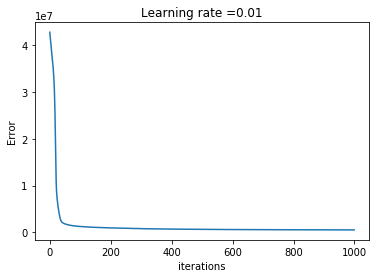

C:\Users\ma_tr\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


load_boston:
	R2 CMLPR: 0.7909557343038598
	MLP R2: 0.8240093474408927


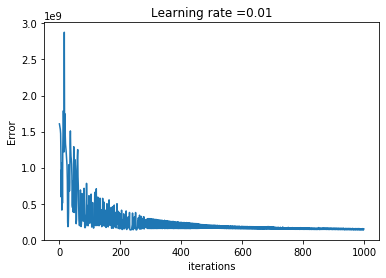

load_diabetes:
	R2 CMLPR: 0.19233818791283175
	MLP R2: 0.2827579326424212


C:\Users\ma_tr\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [2]:
from sklearn.datasets import load_boston, load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for loader in (load_boston, load_diabetes):
    X, y = loader(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    hidden_layer_sizes = (10,)
    cmlp = Pipeline([('stds', StandardScaler()), ('cmlp', CustomMLPRegressor(hidden_layer_sizes=hidden_layer_sizes))])
    mlp = Pipeline([('stds', StandardScaler()), ('mlp', MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0, batch_size=2, learning_rate_init=0.01, max_iter=100, shuffle=False, momentum=0.0))])

    cmlp.fit(X_train, y_train)
    mlp.fit(X_train, y_train)

    cmlp_score = cmlp.score(X_test, y_test)
    mlp_score = mlp.score(X_test, y_test)
    print(loader.__name__ + ':\n\tR2 CMLPR: ' + str(cmlp_score) + '\n\tMLP R2: ' + str(mlp_score))